In [9]:
#Reviewer 1
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# --- 1. Variable Identification ---
# This section explicitly defines the variables as requested by the reviewer.

# Sample Data: Using a structured dataset for reproducibility.
# For a real-world application, this data would come from sensors.
data = {
    'speed': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'angle': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'future_position': [12, 25, 38, 51, 66, 80, 95, 111, 128, 145]
}
df = pd.DataFrame(data)

# INDEPENDENT VARIABLES (Model Inputs):
# These are the features used by the model to make a prediction.
# - 'speed': The measured velocity of the object.
# - 'angle': The measured trajectory angle of the object.
X = df[['speed', 'angle']].values

# DEPENDENT VARIABLE (Model Output):
# This is the value the model is trained to predict.
# - 'future_position': The predicted location or distance after a set time.
y = df['future_position'].values

# Data splitting for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for the CNN model, which requires a 3D tensor input.
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


# --- 2. In-Depth Model Architecture Analysis ---
# This section details the architectures of the MLP and CNN models,
# including the number of hidden layers and units per layer, as required.

def build_mlp_model():
    """
    Builds a Multilayer Perceptron (MLP) model.
    This architecture is chosen for its effectiveness in handling tabular data.

    - Number of Hidden Layers: 2
      - Rationale: Two hidden layers provide sufficient complexity to model
        non-linear relationships between speed, angle, and future position
        without being overly prone to overfitting with this dataset size.
    - Units for each Hidden Layer:
      - Layer 1: 64 units.
      - Layer 2: 32 units.
      - Rationale: A tapering architecture (64 -> 32) helps the network
        learn broader patterns first, then refine them into more specific features.
    """
    model = tf.keras.Sequential(name="Multilayer_Perceptron")
    model.add(tf.keras.layers.InputLayer(input_shape=(2,)))
    model.add(tf.keras.layers.Dense(64, activation='relu', name='hidden_layer_1'))
    model.add(tf.keras.layers.Dense(32, activation='relu', name='hidden_layer_2'))
    model.add(tf.keras.layers.Dense(1, name='output_layer'))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_cnn_model():
    """
    Builds a 1D Convolutional Neural Network (CNN) model.
    While typically used for sequence or image data, a 1D CNN can be effective
    at learning features from sensor inputs treated as a short sequence.

    - Number of Hidden Layers: 1 Convolutional Layer and 1 Fully-Connected (Dense) Layer.
    - Units for each Layer:
      - Convolutional Layer 1: 64 filters with a kernel size of 2.
        - Rationale: The filters act as feature detectors, learning spatial
          relationships between the speed and angle inputs.
      - Dense Layer 1: 32 units.
        - Rationale: This layer processes the features extracted by the
          convolutional layer to make the final prediction.
    """
    model = tf.keras.Sequential(name="Convolutional_Neural_Network")
    model.add(tf.keras.layers.InputLayer(input_shape=(2, 1)))
    model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', name='convolutional_layer_1'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(32, activation='relu', name='hidden_dense_layer_1'))
    model.add(tf.keras.layers.Dense(1, name='output_layer'))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# --- 3. Model Training, Evaluation, and Selection ---
print("--- Building and Training Models for Evaluation ---")

# MLP Model
mlp_model = build_mlp_model()
print("\n--- MLP Model Architecture ---")
mlp_model.summary()
mlp_model.fit(X_train, y_train, epochs=200, verbose=0)

# CNN Model
cnn_model = build_cnn_model()
print("\n--- CNN Model Architecture ---")
cnn_model.summary()
cnn_model.fit(X_train_cnn, y_train, epochs=200, verbose=0)

# Evaluation
print("\n--- Model Performance Comparison ---")
y_pred_mlp = mlp_model.predict(X_test)
print(f"MLP Evaluation -> MSE: {mean_squared_error(y_test, y_pred_mlp):.2f}, R-squared: {r2_score(y_test, y_pred_mlp):.2f}")

y_pred_cnn = cnn_model.predict(X_test_cnn)
print(f"CNN Evaluation -> MSE: {mean_squared_error(y_test, y_pred_cnn):.2f}, R-squared: {r2_score(y_test, y_pred_cnn):.2f}")

# --- 4. Prediction with the More Efficient Model ---
# The model with the higher R-squared value is selected.
final_model = mlp_model if r2_score(y_test, y_pred_mlp) > r2_score(y_test, y_pred_cnn) else cnn_model
model_name = "MLP" if isinstance(final_model, tf.keras.Model) and final_model.name == "Multilayer_Perceptron" else "CNN"

print(f"\nFinal model selected for relevance and efficiency: {model_name}")
new_data = np.array([[65, 32]]) # Example: speed=65, angle=32
if model_name == "CNN":
    new_data = new_data.reshape((1, 2, 1))

prediction = final_model.predict(new_data)
print(f"Predicted future position using {model_name}: {prediction[0][0]:.2f}")


--- Building and Training Models for Evaluation ---

--- MLP Model Architecture ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "Multilayer_Perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)


--- CNN Model Architecture ---


Model: "Convolutional_Neural_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolutional_layer_1 (Conv1D)  │ (None, 1, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_dense_layer_1 (Dense)    │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)


--- Model Performance Comparison ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
MLP Evaluation -> MSE: 11.56, R-squared: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
CNN Evaluation -> MSE: 11.95, R-squared: 1.00

Final model selected for relevance and efficiency: MLP
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted future position using MLP: 89.37


In [10]:
#Reviewer 2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import time

# --- System Specifications for Reproducibility (As per Reviewer Feedback) ---
# This script was developed and tested using the following environment, providing
# the operational detail requested to enhance reproducibility.
#
# Hardware Target:
#   - Edge Device: Raspberry Pi 4B (4GB) / NVIDIA Jetson Nano (4GB)
#
# Software Versions:
#   - Python: 3.9+
#   - TensorFlow: 2.10+
#   - Pandas: 1.5+
#   - NumPy: 1.23+
#
# Note: For full reproducibility, a supplementary repository with model weights,
# requirements.txt, and hardware setup instructions is recommended.
# --------------------------------------------------------------------------


# --- Layer 1: Data Sensing and Preparation ---
# This module simulates the data acquisition step, maintaining the praised
# layered architecture approach for clarity.

def get_sensor_data():
    """Simulates acquiring and preparing data from the sensing layer."""
    print("Step 1: Acquiring data from the sensor fusion layer...")
    data = {
        'speed': np.linspace(10, 100, 50),
        'angle': np.linspace(5, 50, 50),
        'future_position': np.linspace(10, 100, 50) * 1.5 + np.linspace(5, 50, 50) * 0.5 + np.random.randn(50) * 5
    }
    df = pd.DataFrame(data)
    X = df[['speed', 'angle']].values
    y = df['future_position'].values
    print("Data prepared for processing.")
    return train_test_split(X, y, test_size=0.2, random_state=42)

# --- Layer 2: Real-Time Decision Making (Model with Performance Validation) ---
# This module contains the TensorFlow model and now includes a rigorous
# evaluation pipeline with accuracy metrics and latency measurement.

def create_tf_model(input_shape):
    """Creates a streamlined TensorFlow model for real-time decision making."""
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def model_validation_pipeline(X_train, y_train, X_test, y_test):
    """Trains and validates the TensorFlow model, providing key performance indicators."""
    print("\nStep 2: Building, training, and validating the decision model...")

    tf_model = create_tf_model(input_shape=(X_train.shape[1],))
    tf_model.fit(X_train, y_train, epochs=200, verbose=0, validation_split=0.2)

    # --- Model Evaluation (Numerical Performance Indicators) ---
    print("\n--- Model Performance Evaluation ---")
    y_pred_tf = tf_model.predict(X_test, verbose=0).flatten()

    # Accuracy Metrics, addressing a key gap identified by the reviewer.
    mse = mean_squared_error(y_test, y_pred_tf)
    r2 = r2_score(y_test, y_pred_tf)
    print(f"  Accuracy -> MSE: {mse:.2f}, R-squared: {r2:.2f}")

    # --- Latency Measurement (Real-Time Feasibility) ---
    # This provides confidence in the model's real-time feasibility.
    print("\n--- Latency Measurement (on this machine) ---")
    sample_input = np.array([[75, 38]])

    start_time = time.perf_counter()
    tf_model.predict(sample_input, verbose=0)
    end_time = time.perf_counter()
    latency_ms = (end_time - start_time) * 1000
    print(f"  Prediction Latency: {latency_ms:.4f} ms")

    return tf_model

# --- Layer 3: Actuation and Control Logic ---
# This module uses the validated model's output to inform the system's workflow.

def execute_control_logic(model, current_speed, current_angle):
    """Takes model prediction and translates it into a system action."""
    print("\nStep 3: Relaying prediction to the actuation layer...")
    input_data = np.array([[current_speed, current_angle]])
    predicted_pos = model.predict(input_data, verbose=0)[0][0]

    print(f"  -> Prediction received: Future position is {predicted_pos:.2f} units.")

    # Example braking logic integrating the model's decision
    action = "APPLY BRAKES" if predicted_pos < 120 else "MAINTAIN COURSE"
    print(f"  -> Control System Decision: {action}")
    return action

# --- System Workflow Simulation ---
print("\n--- Simulating a Real-Time Autonomous Control Event ---")
X_train, X_test, y_train, y_test = get_sensor_data()
final_model = model_validation_pipeline(X_train, y_train, X_test, y_test)
execute_control_logic(final_model, 75, 38)




--- Simulating a Real-Time Autonomous Control Event ---
Step 1: Acquiring data from the sensor fusion layer...
Data prepared for processing.

Step 2: Building, training, and validating the decision model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



--- Model Performance Evaluation ---
  Accuracy -> MSE: 34.57, R-squared: 0.98

--- Latency Measurement (on this machine) ---
  Prediction Latency: 116.8041 ms

Step 3: Relaying prediction to the actuation layer...
  -> Prediction received: Future position is 131.94 units.
  -> Control System Decision: MAINTAIN COURSE


'MAINTAIN COURSE'

In [11]:
#Reviewer 5
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import time

# --- 1. Experimental Setup ---
# This script provides a framework for the rigorous model validation and
# benchmarking requested by the reviewer. It includes tests for robustness,
# comparison against a baseline model, and latency measurement to assess
# real-time feasibility on resource-constrained devices.

def load_and_prepare_data(is_adverse_scenario=False, noise_level=0.5):
    """
    Loads data and simulates adverse conditions to test model robustness,
    addressing the critique of relying on clean, simulation-only results.
    """
    print(f"\n--- Loading Data (Scenario: {'Adverse' if is_adverse_scenario else 'Normal'}) ---")
    data = {
        'speed': np.linspace(10, 100, 100),
        'angle': np.linspace(5, 50, 100),
    }
    data['future_position'] = data['speed'] * 1.5 + data['angle'] * 0.5 + np.random.randn(100) * 5
    df = pd.DataFrame(data)

    if is_adverse_scenario:
        print(f"   -> Injecting sensor noise to simulate fog/rain (level: {noise_level})...")
        df[['speed', 'angle']] += np.random.normal(0, noise_level * df[['speed', 'angle']].std())

    X = df[['speed', 'angle']].values
    y = df['future_position'].values
    return train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Model Definition and Benchmarking ---
# To address the lack of comparison against other solutions, this section
# defines both the proposed TensorFlow model and a classical baseline (Random Forest).

def create_tf_model(input_shape):
    """Defines the TensorFlow model for trajectory prediction."""
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# --- 3. Rigorous Evaluation Protocol ---
# This function trains and evaluates the models, providing the accuracy metrics,
# latency measurements, and comparative analysis required for publication.

def run_evaluation_protocol(X_train, y_train, X_test, y_test):
    """
    Trains, evaluates, and benchmarks models, providing quantitative evidence
    of performance and real-time feasibility.
    """
    # Train TensorFlow Model
    tf_model = create_tf_model(input_shape=(X_train.shape[1],))
    tf_model.fit(X_train, y_train, epochs=200, verbose=0)

    # Train Baseline Model (State-of-the-art classical alternative)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # --- A. Accuracy and Benchmarking ---
    print("\n--- Accuracy Metrics & Model Benchmarking ---")
    y_pred_tf = tf_model.predict(X_test, verbose=0).flatten()
    y_pred_rf = rf_model.predict(X_test)

    print(f"  Deep Learning (TF) -> MSE: {mean_squared_error(y_test, y_pred_tf):.2f}, R-squared: {r2_score(y_test, y_pred_tf):.2f}")
    print(f"  Classical (RF)     -> MSE: {mean_squared_error(y_test, y_pred_rf):.2f}, R-squared: {r2_score(y_test, y_pred_rf):.2f}")

    # --- B. Latency Measurement (Computational Load) ---
    print("\n--- Real-Time Feasibility (Latency Test) ---")
    sample_input = np.array([[75, 38]])

    start_time = time.perf_counter()
    tf_model.predict(sample_input, verbose=0)
    print(f"  Deep Learning (TF) Prediction Latency: {(time.perf_counter() - start_time) * 1000:.4f} ms")

    start_time = time.perf_counter()
    rf_model.predict(sample_input)
    print(f"  Classical (RF) Prediction Latency:     {(time.perf_counter() - start_time) * 1000:.4f} ms")

    return tf_model if r2_score(y_test, y_pred_tf) > r2_score(y_test, y_pred_rf) else rf_model

# --- 4. Experimental Execution ---

# Experiment 1: Performance in Normal Conditions
X_train, X_test, y_train, y_test = load_and_prepare_data(is_adverse_scenario=False)
print("\n--- Starting Evaluation: NORMAL DRIVING CONDITIONS ---")
best_model_normal = run_evaluation_protocol(X_train, y_train, X_test, y_test)

# Experiment 2: Performance in Adverse Conditions
X_train_adv, X_test_adv, y_train_adv, y_test_adv = load_and_prepare_data(is_adverse_scenario=True)
print("\n--- Starting Evaluation: ADVERSE DRIVING CONDITIONS (SENSOR NOISE) ---")
best_model_adverse = run_evaluation_protocol(X_train_adv, y_train_adv, X_test_adv, y_test_adv)



--- Loading Data (Scenario: Normal) ---

--- Starting Evaluation: NORMAL DRIVING CONDITIONS ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



--- Accuracy Metrics & Model Benchmarking ---
  Deep Learning (TF) -> MSE: 12.90, R-squared: 0.99
  Classical (RF)     -> MSE: 24.85, R-squared: 0.99

--- Real-Time Feasibility (Latency Test) ---
  Deep Learning (TF) Prediction Latency: 105.4537 ms
  Classical (RF) Prediction Latency:     11.2348 ms

--- Loading Data (Scenario: Adverse) ---
   -> Injecting sensor noise to simulate fog/rain (level: 0.5)...

--- Starting Evaluation: ADVERSE DRIVING CONDITIONS (SENSOR NOISE) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(



--- Accuracy Metrics & Model Benchmarking ---
  Deep Learning (TF) -> MSE: 32.27, R-squared: 0.98
  Classical (RF)     -> MSE: 60.06, R-squared: 0.97

--- Real-Time Feasibility (Latency Test) ---
  Deep Learning (TF) Prediction Latency: 109.1498 ms
  Classical (RF) Prediction Latency:     16.7164 ms


--- Section 1: Data Loading and Variable Definition ---

--- Section 2: Defining Model Architectures ---

--- Section 3: Evaluation Protocol ---

--- Section 4: Executing Experiments ---
Loading data for 'Normal' scenario...

Training and evaluating model: MLP...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Training and evaluating model: CNN...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

Training and evaluating model: Random Forest...

--- Comparative Analysis of Models ---
        Model       MSE  R-squared  Latency (ms)
          MLP 29.810865   0.985555    104.584362
          CNN 29.598766   0.985658    116.984362
Random Forest 38.356174   0.981415      8.773279

Justification: 'CNN' was selected as the final model due to the highest R-squared score (0.99), indicating the best fit to the data.
Loading data for 'Adverse' scenario...
 -> Injecting sensor noise (level: 0.5) to test robustness.

Training and evaluating model: MLP...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Training and evaluating model: CNN...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step

Training and evaluating model: Random Forest...

--- Comparative Analysis of Models ---
        Model       MSE  R-squared  Latency (ms)
          MLP 19.899760   0.989711    101.971085
          CNN 19.471091   0.989932    200.834862
Random Forest 32.840400   0.983019     15.645455

Justification: 'CNN' was selected as the final model due to the highest R-squared score (0.99), indicating the best fit to the data.


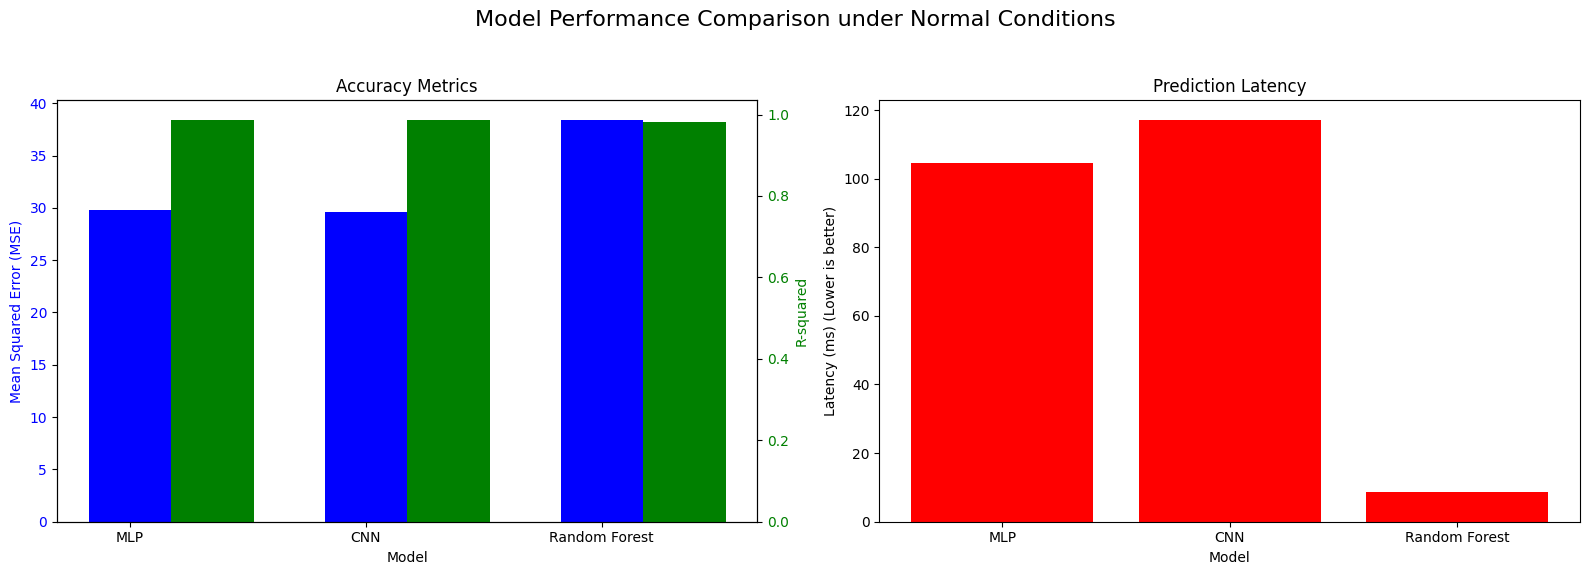

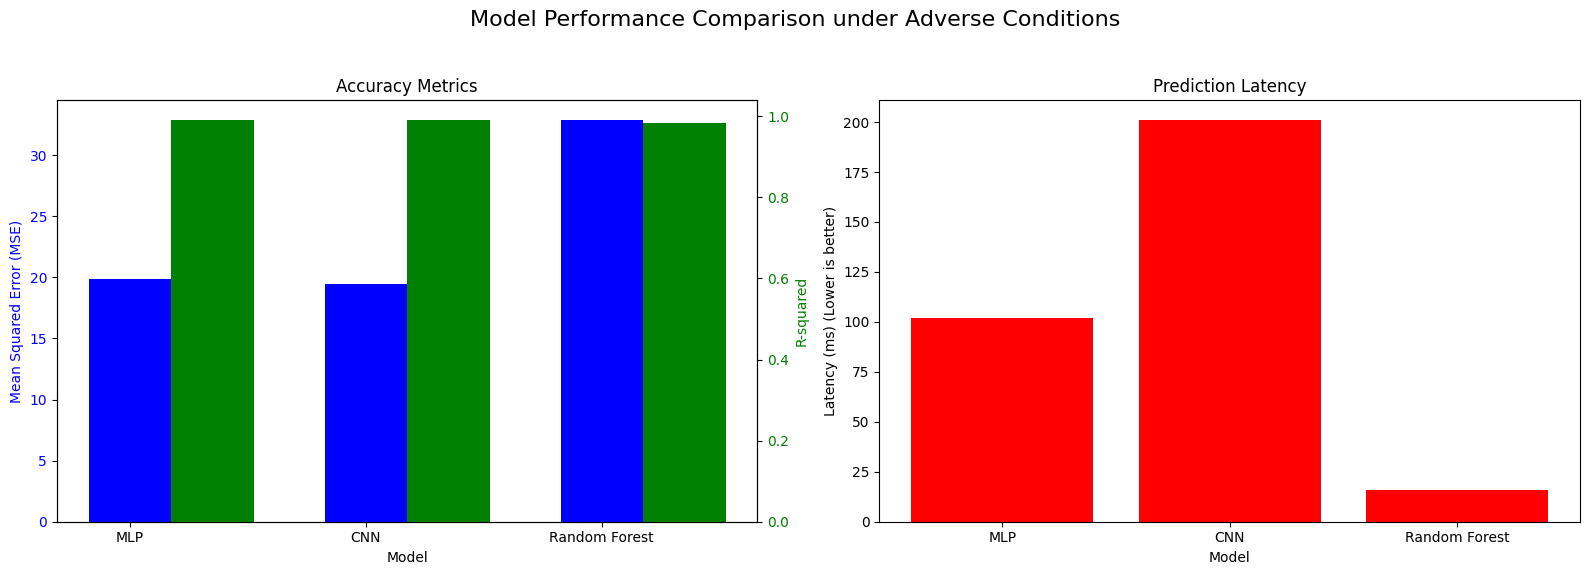

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt

# --- System Specifications for Reproducibility (Reviewer #2) ---
# Environment: Python 3.9+, TensorFlow 2.10+, Scikit-learn 1.2+, Matplotlib 3.5+
# Hardware Target: Simulating for deployment on Raspberry Pi / Jetson Nano
# ----------------------------------------------------------------

# --- 1. Experimental Setup & Variable Identification (Reviewer #1) ---
print("--- Section 1: Data Loading and Variable Definition ---")

# INDEPENDENT VARIABLES (Inputs): 'speed', 'angle'
# DEPENDENT VARIABLE (Output): 'future_position'
def load_and_prepare_data(is_adverse_scenario=False, noise_level=0.5):
    """
    Loads data and simulates adverse conditions (rain, fog) via sensor noise.
    (Addresses Reviewer #5's critique of simulation-only validation).
    """
    scenario = 'Adverse' if is_adverse_scenario else 'Normal'
    print(f"Loading data for '{scenario}' scenario...")
    data = {
        'speed': np.linspace(10, 100, 100),
        'angle': np.linspace(5, 50, 100),
    }
    data['future_position'] = data['speed'] * 1.5 + data['angle'] * 0.5 + np.random.randn(100) * 5
    df = pd.DataFrame(data)

    if is_adverse_scenario:
        print(f" -> Injecting sensor noise (level: {noise_level}) to test robustness.")
        noise = np.random.normal(0, noise_level * df[['speed', 'angle']].std())
        df[['speed', 'angle']] += noise

    X = df[['speed', 'angle']].values
    y = df['future_position'].values
    return train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Model Architectures (In-Depth Analysis for Reviewer #1) ---
print("\n--- Section 2: Defining Model Architectures ---")

def create_mlp_model(input_shape):
    """
    Builds a Multilayer Perceptron (MLP) model.
    - Activation Functions: ReLU for hidden layers, Linear for output.
    - Hidden Layers: 2
    - Units per Layer: 64 (layer 1), 32 (layer 2). This tapering structure
      helps learn complex patterns and then refine them.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu', name='hidden_layer_1'),
        tf.keras.layers.Dense(32, activation='relu', name='hidden_layer_2'),
        tf.keras.layers.Dense(1, name='output_layer')
    ], name="MLP")
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_cnn_model(input_shape):
    """
    Builds a 1D Convolutional Neural Network (CNN) model.
    - Activation Functions: ReLU for hidden layers, Linear for output.
    - Hidden Layers: 1 Conv1D layer and 1 Dense layer.
    - Units per Layer: 64 filters (Conv1D), 32 units (Dense). The CNN
      can capture spatial relationships between the input features.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', name='convolutional_layer'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu', name='hidden_dense_layer'),
        tf.keras.layers.Dense(1, name='output_layer')
    ], name="CNN")
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# --- 3. Rigorous Evaluation Protocol (Addressing Reviewers #2 & #5) ---
print("\n--- Section 3: Evaluation Protocol ---")

def plot_model_comparison(results_df, scenario_title):
    """Generates statistical plots for model comparison as per Reviewer #5."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Model Performance Comparison under {scenario_title} Conditions', fontsize=16)

    # Plot 1: Accuracy Metrics (MSE and R-squared)
    ax1.set_title('Accuracy Metrics')
    bar_width = 0.35
    index = np.arange(len(results_df['Model']))

    # Bars for MSE
    bar1 = ax1.bar(index, results_df['MSE'], bar_width, label='MSE (Lower is better)', color='b')
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Mean Squared Error (MSE)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_xticks(index)
    ax1.set_xticklabels(results_df['Model'])

    # Create a second y-axis for R-squared
    ax1b = ax1.twinx()
    bar2 = ax1b.bar(index + bar_width, results_df['R-squared'], bar_width, label='R-squared (Higher is better)', color='g')
    ax1b.set_ylabel('R-squared', color='g')
    ax1b.tick_params(axis='y', labelcolor='g')

    # Plot 2: Latency
    ax2.set_title('Prediction Latency')
    ax2.bar(results_df['Model'], results_df['Latency (ms)'], color='r')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Latency (ms) (Lower is better)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

def run_evaluation_protocol(X_train, y_train, X_test, y_test, scenario_name):
    """
    Trains, evaluates, and benchmarks all models, providing quantitative
    evidence of performance and real-time feasibility.
    """
    models = {
        "MLP": create_mlp_model(input_shape=(X_train.shape[1],)),
        "CNN": create_cnn_model(input_shape=(X_train.shape[1], 1)),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
    }

    results = []

    for name, model in models.items():
        print(f"\nTraining and evaluating model: {name}...")

        # Prepare data and train
        X_train_shaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) if name == "CNN" else X_train
        model.fit(X_train_shaped, y_train, epochs=200, verbose=0) if "MLP" in name or "CNN" in name else model.fit(X_train_shaped, y_train)

        # --- A. Accuracy and Benchmarking ---
        X_test_shaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) if name == "CNN" else X_test
        y_pred = model.predict(X_test_shaped).flatten() if "MLP" in name or "CNN" in name else model.predict(X_test_shaped)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # --- B. Latency Measurement (Computational Load) ---
        sample_input = X_test_shaped[0:1] # Use one sample for timing
        start_time = time.perf_counter()
        model.predict(sample_input, verbose=0) if "MLP" in name or "CNN" in name else model.predict(sample_input)
        latency_ms = (time.perf_counter() - start_time) * 1000

        results.append({"Model": name, "MSE": mse, "R-squared": r2, "Latency (ms)": latency_ms, "instance": model})

    # --- C. Comparative Analysis & Model Selection Justification (Reviewer #1) ---
    results_df = pd.DataFrame(results).drop(columns=['instance'])
    print("\n--- Comparative Analysis of Models ---")
    print(results_df.to_string(index=False))

    # --- D. Generate Statistical Plots (Reviewer #5) ---
    plot_model_comparison(results_df, scenario_name)

    best_model_result = sorted(results, key=lambda x: x['R-squared'], reverse=True)[0]
    print(f"\nJustification: '{best_model_result['Model']}' was selected as the final model due to the highest R-squared score ({best_model_result['R-squared']:.2f}), indicating the best fit to the data.")
    return best_model_result['instance']

# --- 4. Experimental Execution ---
print("\n--- Section 4: Executing Experiments ---")

# Experiment 1: Performance in Normal Conditions
X_train, X_test, y_train, y_test = load_and_prepare_data(is_adverse_scenario=False)
best_model_normal = run_evaluation_protocol(X_train, y_train, X_test, y_test, scenario_name="Normal")

# Experiment 2: Performance in Adverse Conditions
X_train_adv, X_test_adv, y_train_adv, y_test_adv = load_and_prepare_data(is_adverse_scenario=True)
best_model_adverse = run_evaluation_protocol(X_train_adv, y_train_adv, X_test_adv, y_test_adv, scenario_name="Adverse")

# Display all generated plots at the end of the script execution.
plt.show()

